#### Implementation of Polynomial Regression
Polynomial regression is a type of regression analysis in which the relationship between the independent variable(s) and the dependent variable is modeled as an nth degree polynomial. It's in the form of ax2+bx+c = 0 with 'u'shape on 2d plane.

In [ ]:
## Prerequisites Libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


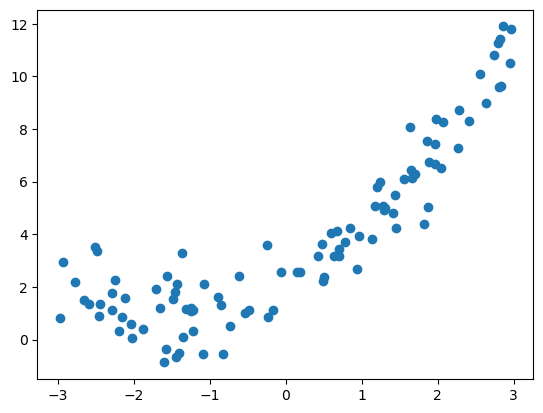

In [6]:
## Create some sample data:

x = 6 * np.random.rand(100,1) - 3
y = 0.5 * x**2 + 1.5*x + 2 + np.random.randn(100,1)

## quadratic equation used y = 0.5x^2 + 1.5x + 2 + outliers
## y = ax^2 + bx + c

plt.scatter(x,y)



In [4]:
## Train and test the dataset:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [5]:
## Selecting the model algorithm:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train) # fit the model to the training data


LinearRegression()

In [8]:
regression.coef_ # get the coefficients of the model

array([[1.59397809]])

In [11]:
y_pred = regression.predict(x_test) # predict the y values for the test data
y_pred[:5] # show the first 5 predictions

array([[ 6.81533096],
       [ 2.52385703],
       [ 7.53048663],
       [ 7.14717351],
       [-0.86832387]])

In [13]:
## lets check the performance metrics

from sklearn.metrics import r2_score
score = r2_score(y_test,regression.predict(x_test))
print("R^2 score: ",score) # R^2 score

R^2 score:  0.7724759091484716


Text(0, 0.5, 'y_train')

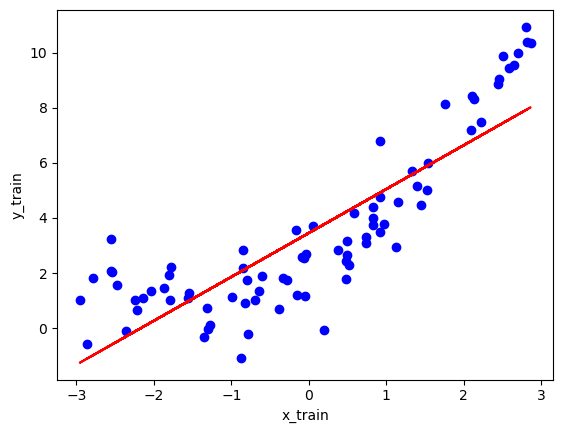

In [21]:
## Lets visualize this model
plt.plot(x_train, regression.predict(x_train),color='red', label='Predicted')  # Draw a straight line for predictions
plt.scatter(x_train, y_train, color='blue', label='Actual')
plt.xlabel('x_train')
plt.ylabel('y_train')

In [ ]:
## Lets apply polynomial transformation with degres =2

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2,include_bias=True) 
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [23]:
x_train_poly

array([[ 1.00000000e+00, -2.36118971e+00,  5.57521685e+00],
       [ 1.00000000e+00,  2.12934145e+00,  4.53409500e+00],
       [ 1.00000000e+00, -6.96159043e-01,  4.84637414e-01],
       [ 1.00000000e+00,  4.89054597e-01,  2.39174398e-01],
       [ 1.00000000e+00, -1.31470089e+00,  1.72843844e+00],
       [ 1.00000000e+00, -1.80616379e+00,  3.26222763e+00],
       [ 1.00000000e+00,  2.70564879e+00,  7.32053538e+00],
       [ 1.00000000e+00,  2.51473817e+00,  6.32390804e+00],
       [ 1.00000000e+00,  4.79430470e-01,  2.29853575e-01],
       [ 1.00000000e+00,  8.24500079e-01,  6.79800380e-01],
       [ 1.00000000e+00,  9.73550906e-01,  9.47801366e-01],
       [ 1.00000000e+00, -2.83214906e-01,  8.02106831e-02],
       [ 1.00000000e+00, -1.27379679e+00,  1.62255826e+00],
       [ 1.00000000e+00, -1.29748991e+00,  1.68348008e+00],
       [ 1.00000000e+00, -8.53942006e-01,  7.29216949e-01],
       [ 1.00000000e+00, -7.95950607e-01,  6.33537369e-01],
       [ 1.00000000e+00, -1.77887568e+00

In [24]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(x_train_poly,y_train)
y_pred = regression.predict(x_test_poly)
print("R2 score: ", r2_score(y_test, y_pred))

R2 score:  0.9445582418302687


In [25]:
print(regression.coef_)

[[0.         1.58794818 0.50003584]]


In [26]:
print(regression.intercept_)

[2.12270329]


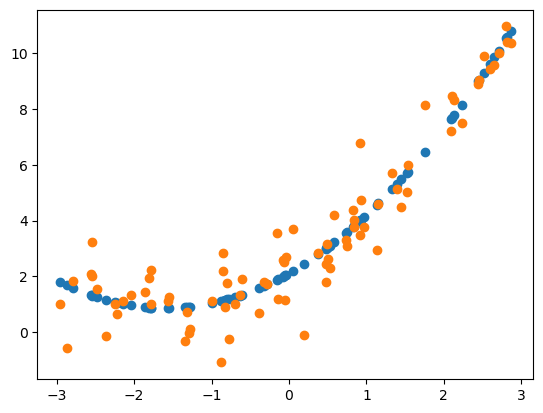

In [27]:
plt.scatter(x_train,regression.predict(x_train_poly))
plt.scatter(x_train,y_train)

In [28]:
## Lets apply polynomial transformation with degres = 3

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3,include_bias=True) 
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

In [29]:
x_train_poly

array([[ 1.00000000e+00, -2.36118971e+00,  5.57521685e+00,
        -1.31641447e+01],
       [ 1.00000000e+00,  2.12934145e+00,  4.53409500e+00,
         9.65463640e+00],
       [ 1.00000000e+00, -6.96159043e-01,  4.84637414e-01,
        -3.37384718e-01],
       [ 1.00000000e+00,  4.89054597e-01,  2.39174398e-01,
         1.16969339e-01],
       [ 1.00000000e+00, -1.31470089e+00,  1.72843844e+00,
        -2.27237956e+00],
       [ 1.00000000e+00, -1.80616379e+00,  3.26222763e+00,
        -5.89211742e+00],
       [ 1.00000000e+00,  2.70564879e+00,  7.32053538e+00,
         1.98067977e+01],
       [ 1.00000000e+00,  2.51473817e+00,  6.32390804e+00,
         1.59029729e+01],
       [ 1.00000000e+00,  4.79430470e-01,  2.29853575e-01,
         1.10198808e-01],
       [ 1.00000000e+00,  8.24500079e-01,  6.79800380e-01,
         5.60495467e-01],
       [ 1.00000000e+00,  9.73550906e-01,  9.47801366e-01,
         9.22732879e-01],
       [ 1.00000000e+00, -2.83214906e-01,  8.02106831e-02,
      

In [30]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(x_train_poly,y_train)
y_pred = regression.predict(x_test_poly)
print("R2 score: ", r2_score(y_test, y_pred))

R2 score:  0.9453277505346501


In [32]:
## Prediction of new data set

x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
x_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01],
       [ 1.00000000e+00, -2.69849246e+00,  7.28186157e+00,
        -1.96500486e+01],
       [ 1.00000000e+00, -2.66834171e+00,  7.12004747e+00,
      

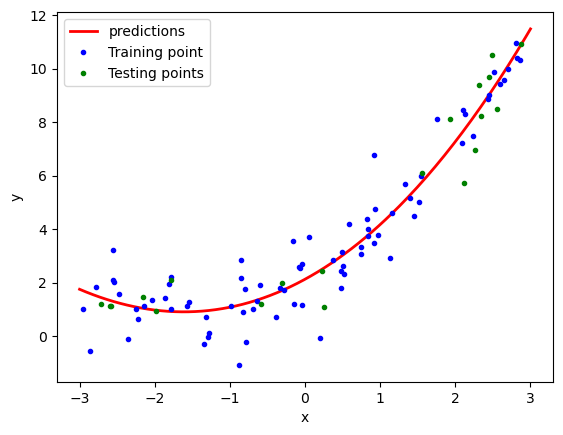

In [35]:
y_new = regression.predict(x_new_poly)
plt.plot(x_new,y_new,"r-",linewidth=2, label="predictions")
plt.plot(x_train,y_train,"b.",label='Training point')
plt.plot(x_test,y_test,"g.",label='Testing points')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()